In [2]:
import matplotlib as plt
from matplotlib import pyplot as plt
import string
import numpy as np
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import fasttext
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

<center>
<h1>
<u>
Setup
</h1>
</center>

<center>
<h1>
Loading in test and validation sets
</h1>
</center>

In [3]:
train_data_english = pd.read_csv('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/english_test_with_labels.csv')

<center>
<h1>
<u>
Preprocessing
</u>
</h1>
</center>

<center>
<h1>
<h2>
Custom stopword and clutter removal
</h2>
</center>


In [4]:
#create custom stopword list
custom_stopwords = set([
    'covid', 'covid-19', 'coronavirus', 'pandemic', 'virus', 
    'vaccine', 'vaccination', 'vaccinated', 'vaccinate',
    'symptoms', 'cases', 'infection', 'infected', 'infections',
    'health', 'healthcare', 'hospital', 'doctor', 'nurse',
    'mask', 'masks', 'quarantine', 'lockdown', 'isolation',
    'positive', 'negative', 'test', 'testing', 'tested',
    'who', 'cdc', 'government', 'authorities', 'official', 'officials',
    'social', 'distancing', 'guidelines', 'rules', 'regulations',
    'information', 'misinformation', 'news', 'article', 'post', 'comment', 'share',
    'people', 'person', 'individual', 'individuals', 'group', 'groups',
    'update', 'report', 'reported', 'reporting',
    'today', 'yesterday', 'tomorrow', 'day', 'days', 'week', 'weeks', 'month', 'months', 'year', 'years'
    'https', 'http', 'www', 'com', 'org', 'net', 'gov', 'edu', 'html', 'php', 'asp', 'aspx', 'jsp', 'php', 'cfm',
    '#', 't', 'co','http','https','s','COVID','COVID19','Corona','amp','a','b','c',
    'd','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',"IndiaFightsCorona",
    "CoronaVirusUpdates","MoHFW_India","RT", "NPR", "CDCgov", "WHO", "HHSGov", "CNBC", "CNN", "BBCWorld", "nytimes",
    "CNN" , "BBCWorld", "nytimes", "washingtonpost", "guardian", "Reuters", "CDC", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz", "COVID19", "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo (Congo-Brazzaville)", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic (Czechia)", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar (formerly Burma)", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau", "Palestine State", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States of America", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City (Holy See)", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
])

all_stopwords = ENGLISH_STOP_WORDS.union(custom_stopwords)
default_stopwords=set(STOPWORDS)

def remove_stopwords_custom(text):
    if isinstance(text,str):
        return ' '.join([word for word in text.split() if word not in all_stopwords])
    else:
        return ' '.join([word for word in str(text).split() if word not in all_stopwords])
        return text

def remove_stopwords_default(text):
    if isinstance(text,str):
        return ' '.join([word for word in text.split() if word not in default_stopwords])
    else: #make into string if not already
        return ' '.join([word for word in str(text).split() if word not in default_stopwords])
        return text

def remove_clutter_custom(text): #dependent on 
    text = text.apply(remove_stopwords_custom)
    text = text.str.replace(r'#', '') #Remove instances of '#'
    text = text.str.replace(r'@', '') #Remove instances of '@'
    text = text.str.replace(r'-', '') #Remove instances of '-'
    text = text.str.replace(r':', '') #Remove instances of ':'
    text = text.str.replace(r';', '') #Remove instances of ';'
    text = text.str.replace(r'!', '') #Remove instances of '!'
    text = text.str.replace(r'.', '') #Remove instances of '.'
    text = text.str.replace(r'?', '') #Remove instances of '?'
    text = text.str.replace(r',', '') #Remove instances of ','
    text = text.str.replace(r'/', '') #Remove instances of '/'
    text = text.str.replace(r' \ ', '') #Remove instances of '\'
    text = text.str.replace(r'>', '') #Remove instances of '>'
    text = text.str.replace(r'<', '') #Remove instances of '<'
    text = text.str.replace(r'^', '') #Remove instances of '^'
    text = text.str.replace(r'*', '') #Remove instances of '*'
    text = text.str.replace(r'_', '') #Remove instances of '_'
    text = text.str.replace(r' " ', '') #Remove instances of ' " '
    text = text.str.replace(r'~', '') #Remove instances of '~'
    text = text.str.replace(r'[^\x00-\x7F]+', '', regex=True) #Remove instances of emojis
    text = text.str.replace(r'\s+', ' ').str.strip() #Further clean up
    text = text.apply(remove_stopwords_custom) 
    return text

def remove_clutter_default(text): #dependent on 
    text = text.apply(remove_stopwords_default)
    text = text.str.replace(r'#', '') #Remove instances of '#'
    text = text.str.replace(r'@', '') #Remove instances of '@'
    text = text.str.replace(r'-', '') #Remove instances of '-'
    text = text.str.replace(r':', '') #Remove instances of ':'
    text = text.str.replace(r';', '') #Remove instances of ';'
    text = text.str.replace(r'!', '') #Remove instances of '!'
    text = text.str.replace(r'.', '') #Remove instances of '.'
    text = text.str.replace(r'?', '') #Remove instances of '?'
    text = text.str.replace(r',', '') #Remove instances of ','
    text = text.str.replace(r'/', '') #Remove instances of '/'
    text = text.str.replace(r' \ ', '') #Remove instances of '\'
    text = text.str.replace(r'>', '') #Remove instances of '>'
    text = text.str.replace(r'<', '') #Remove instances of '<'
    text = text.str.replace(r'^', '') #Remove instances of '^'
    text = text.str.replace(r'*', '') #Remove instances of '*'
    text = text.str.replace(r'_', '') #Remove instances of '_'
    text = text.str.replace(r' " ', '') #Remove instances of ' " '
    text = text.str.replace(r'~', '') #Remove instances of '~'
    text = text.str.replace(r'[^\x00-\x7F]+', '', regex=True) #Remove instances of emojis
    text = text.str.replace(r'\s+', ' ').str.strip() #Further clean up 
    text = text.apply(remove_stopwords_default)
    return text

In [5]:
train_data_english['tweet'] = remove_clutter_custom(train_data_english['tweet'])

<center>
<h2>
Custom label formatting
</h2>

</center>

In [7]:
'''
Function for formatting text for fasttext model.
Adds '__label__' to each line of text in text containing column.

'''

def add_label(row):
    return f"__label__{row['label']} {row['tweet']}"

In [8]:
train_data_english['labeled_text'] = train_data_english.apply(add_label, axis=1)

train_data_english['labeled_text'].to_csv('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/train_data_labeled_May1624', index=False, header=False)

labeled_text = ('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/train_data_labeled_May1624')

<center>
<h1>
<u>
Model Training
</u>
</h1>
</center>

In [9]:
path = ('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText')

peripheral_text =('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/full_text_cleaned.txt')

validation_set = []
with open(peripheral_text, 'r') as f:
    # Comment: Validation set
    for line in f:
        line = line.replace("    ", "\t").strip()
        list = validation_set.append(line)
        list = validation_set.append('\n')
        
validation_set = pd.Series(validation_set)
validation_set = remove_clutter_custom(validation_set)

validation_set.to_csv(path + '/validation_set_cleaned_May1624', index=False, header=False)

In [10]:
# Train the FastText model

model = fasttext.train_supervised(input='/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/train_data_labeled_May1624', autotuneValidationFile=(path + '/validation_set_cleaned_May1624'), autotuneDuration=20, label= '__label__')

Progress: 100.0% Trials:   37 Best score:       nan ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  11199
Number of labels: 2
Progress: 100.0% words/sec/thread:  239024 lr:  0.000000 avg.loss:  0.544518 ETA:   0h 0m 0s


In [11]:
train_data_english['tweet'].to_csv('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/tweet_contents.txt', index=False, header=False)
tweet_contents = ('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/tweet_contents.txt')
tweet_contents=pd.read_csv(tweet_contents, header=None)

In [12]:
predicted_labels = []
for row in tweet_contents[0]:
    prediction = model.predict(row)
    label = prediction[0][0]
    label = label.replace('__label__', '')
    predicted_labels.append(label)

actual_labels = []
for label in train_data_english['label']:
    label = label.replace('__label__', ' ')
    actual_labels.append(label)

In [14]:
import sklearn.metrics as skm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

# Calculate metrics
precision, recall, fscore, support = score(actual_labels,predicted_labels,average='weighted')  # use 'weighted' for imbalanced classes
accuracy = accuracy_score(actual_labels, predicted_labels)

# Output results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {fscore}')
print(f'Support: {support}')
print(f'Accuracy: {accuracy}')

Precision: 0.8960028473439045
Recall: 0.8943925233644859
F1 score: 0.8944468708386554
Support: None
Accuracy: 0.8943925233644859


<center>
<h1>
<u>
Confusion Matrix
</h1>
</center>

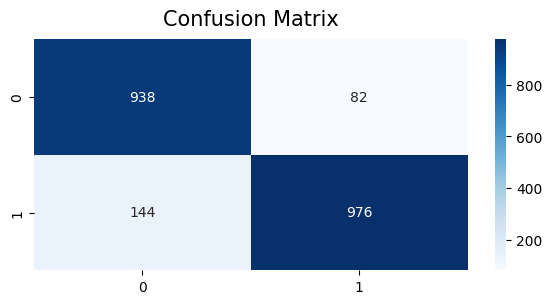

              precision    recall  f1-score   support

        fake       0.87      0.92      0.89      1020
        real       0.92      0.87      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.89      0.90      0.89      2140
weighted avg       0.90      0.89      0.89      2140



In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
# Create confusion matrix
plt.figure(figsize=(7,3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=15, pad=10, loc='center')
plt.show()

print(classification_report(actual_labels, predicted_labels))

Making some predictions

In [16]:
def prediction_wizard(input_text=None):
    if input_text is not None:
        prediction = model.predict(input_text)
        label = prediction[0][0]
        label = label.replace('__label__', '')
        print(label)
    else:
        input_text = input('Enter the text you would like to predict: ')
        prediction = model.predict(input_text)
        label = prediction[0][0]
        label = label.replace('__label__', '')
        print(label)

In [17]:
#From random tweet on Twitter: https://twitter.com/PoisonDeathShot/status/1789495792039870702
prediction_wizard('2021 - Rosa Koire, Who Warned About the Global “Agenda 21” Back in 2012, Describes the Plan & Where We’re Headed.  It Should Scare the Shit Out of You. (RIP)')

#From https://www.cdc.gov/vaccines/covid-19/clinical-considerations/interim-considerations-us.html
prediction_wizard('Healthcare providers who administer the Moderna COVID-19 Vaccine (2023-2024 Formula) to individuals ages 6 months through 11 years should ensure the correct volume of the vaccine (0.25 mL) is withdrawn from the vial and administered to the recipient. Discard vial and excess volume after extracting a single dose.') 

#Taken from https://www.cdc.gov/vaccines/covid-19/info-by-product/index.html
prediction_wizard('Janssen COVID-19 Vaccine is no longer available in the U.S. All remaining U.S. government stock of Janssen COVID-19 Vaccine expired May 7, 2023. Dispose of any remaining Janssen COVID-19 Vaccine in accordance with local, state, and federal regulations.People ages 18 years and older who received 1 dose of Janssen COVID-19 Vaccine should be considered to have received a single-dose Janssen primary series.People ages 18 years and older who received 1 or 2 Janssen COVID-19 Vaccine dose are recommended to receive 1 bivalent mRNA dose (Moderna or Pfizer-BioNTech) at least 2 months after completion of the previous dose.')  

#Taken from video summary: https://www.bitchute.com/video/SyfZYzVU1U7s/ ; 'COVID VACCINES HAVE HIGHEST ‘KILL RATE’ IN MEDICAL HISTORY – MEDIA BLACKOUT'
prediction_wizard('Covid mRNA vaccines are now officially the deadliest drugs in the history of Western medicine, killing and injuring hundreds of millions of people around the world as the fallout from the mass roll out continues to snowball. Big Pharma and the global elite have blood on their hands and they are using mainstream media to whitewash and cover up the greatest crime in history.World-renowned OBGYN physician Dr. James Thorp has blown the whistle on the massive cover-up, warning the public about the disturbing numbers that governments, Big Pharma and the mainstream media are working overtime to keep hidden from the public.') 

fake
real
real
fake


<center>
<h1>
Testing model on another, smaller dataset.
</h1>

In [18]:
news_claim = pd.read_csv('/Users/alexz/Programming/Python Projects/Sentiment Analysis of COVID-19 Misinformation with FastText/Sentiment-Analysis-of-COVID-19-Misinformation-with-FastText/news_claim.csv')

#Simplify label to "real" and "fake"
news_claim['group'] = news_claim['group'].astype(str)
news_claim['group']= news_claim['group'].replace('0','real').replace('2', 'real').replace('1', 'fake').replace('3', 'fake')

#looking at class distribution
news_claim['group'].value_counts()

group
fake    1000
real     353
Name: count, dtype: int64

<center>
<h1>
Fixing class imbalances
</h1>
<center>

In [19]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = news_claim[news_claim.group=='fake']
df_minority = news_claim[news_claim.group=='real']

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
newsclaim_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
newsclaim_upsampled.group.value_counts()

group
fake    1000
real    1000
Name: count, dtype: int64